In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score


2024-06-26 19:42:05.976479: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-26 19:42:05.996416: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Define paths

train_dir = "DATASET_DDPM"
valid_dir = "DATASET_VALIDATION"

# Load datasets with an 80-20 split for training and validation
train_ds = image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    valid_dir,
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Access class names
class_names = train_ds.class_names
num_classes = len(class_names)
print("Class names:", class_names)

Found 19002 files belonging to 10 classes.


2024-06-26 19:42:13.766637: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-26 19:42:13.769505: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-26 19:42:13.769524: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-26 19:42:13.771017: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-26 19:42:13.771034: I external/local_xla/xla/stream_executor

Found 1000 files belonging to 10 classes.
Class names: ['BULK CARRIER', 'CONTAINER SHIP', 'GENERAL CARGO', 'OIL PRODUCTS TANKER', 'PASSENGERS SHIP', 'TANKER', 'TRAWLER', 'TUG', 'VEHICLES CARRIER', 'YACHT']


In [3]:
# Load VGG16 without the top layers and with weights pre-trained on ImageNet
base_model = VGG16(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Create new model on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [4]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20


I0000 00:00:1719430939.405791    7304 service.cc:145] XLA service 0x7feb24022370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1719430939.405837    7304 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-06-26 19:42:19.420329: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-26 19:42:19.501597: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1719430940.162441    7452 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1585', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1719430940.181316    7435 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1585', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:

 19/594 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1531 - loss: 8.2483

I0000 00:00:1719430942.893217    7304 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


589/594 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4222 - loss: 2.6567

I0000 00:00:1719430948.459760    7540 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1585', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1719430948.462688    7542 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1585', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1719430948.506633    7555 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1585', 32 bytes spill stores, 32 bytes spill loads



594/594 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.4231 - loss: 2.6468 - val_accuracy: 0.6720 - val_loss: 0.9214
Epoch 2/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6282 - loss: 1.0584 - val_accuracy: 0.7190 - val_loss: 0.7889
Epoch 3/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6695 - loss: 0.9433 - val_accuracy: 0.7340 - val_loss: 0.7302
Epoch 4/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6944 - loss: 0.8656 - val_accuracy: 0.7500 - val_loss: 0.7038
Epoch 5/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7072 - loss: 0.8161 - val_accuracy: 0.7710 - val_loss: 0.6304
Epoch 6/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7154 - loss: 0.7760 - val_accuracy: 0.7730 - val_loss: 0.5908
Epoch 7/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7340 - loss: 0.7401 - val_accuracy: 0.7960 - val_loss: 0.5499
Epoch 8/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7403 - loss: 0.7166 - val_accuracy: 0.8070 - va

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9002 - loss: 0.3517
Validation Accuracy: 90.20%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

2024-06-26 19:44:19.106136: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<Figure size 1000x800 with 0 Axes>

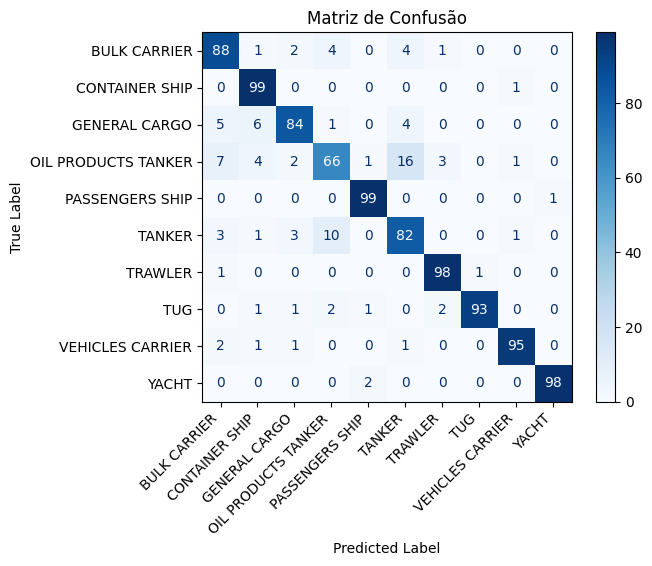

Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-Score: 0.90

Classification Report:
                      precision    recall  f1-score   support

       BULK CARRIER       0.83      0.88      0.85       100
     CONTAINER SHIP       0.88      0.99      0.93       100
      GENERAL CARGO       0.90      0.84      0.87       100
OIL PRODUCTS TANKER       0.80      0.66      0.72       100
    PASSENGERS SHIP       0.96      0.99      0.98       100
             TANKER       0.77      0.82      0.79       100
            TRAWLER       0.94      0.98      0.96       100
                TUG       0.99      0.93      0.96       100
   VEHICLES CARRIER       0.97      0.95      0.96       100
              YACHT       0.99      0.98      0.98       100

           accuracy                           0.90      1000
          macro avg       0.90      0.90      0.90      1000
       weighted avg       0.90      0.90      0.90      1000



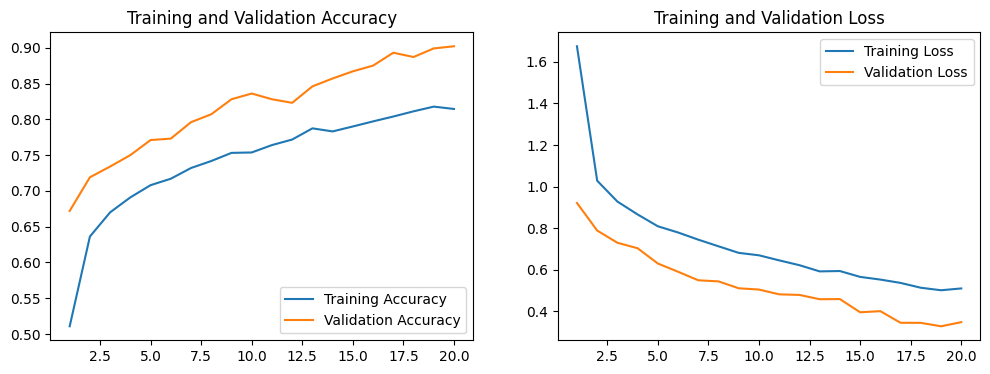

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


2024-06-26 19:44:19.458084: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


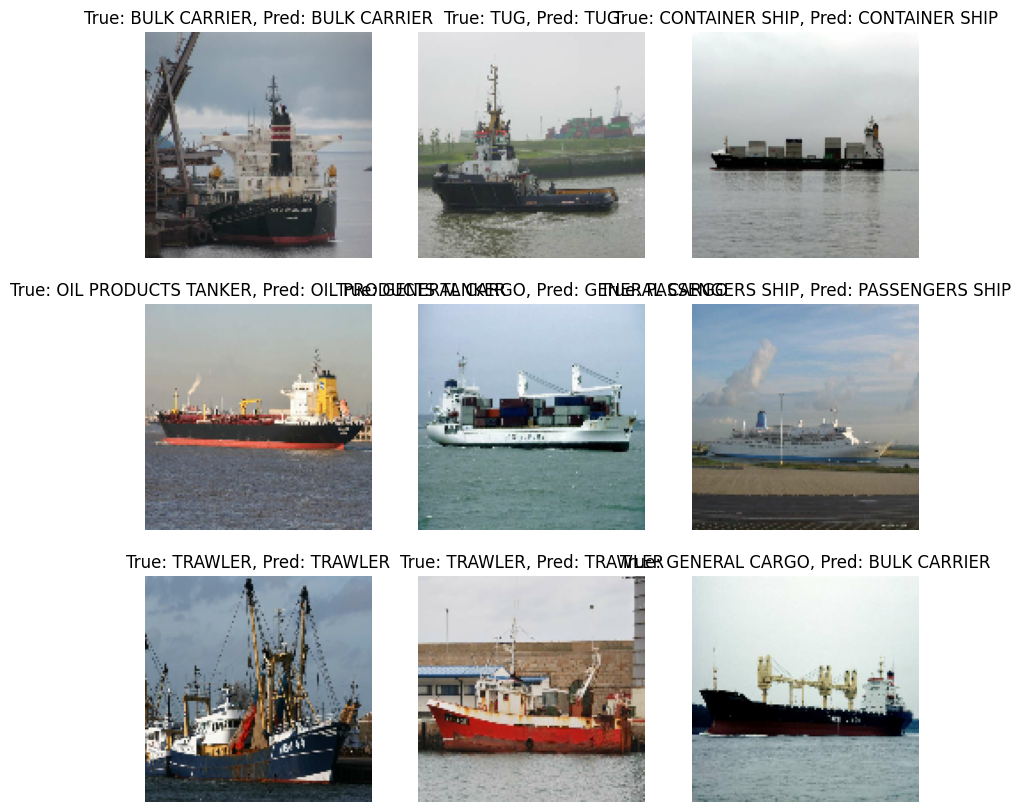

In [5]:
# Evaluate the model
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Generate predictions and true labels
true_labels = []
pred_labels = []

for images, labels in val_ds:
    predictions = model.predict(images)
    pred_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

# Adjust ticks position
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusão')
plt.show()

# Calcular as métricas
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average='weighted')
recall = recall_score(true_labels, pred_labels, average='weighted')
f1 = f1_score(true_labels, pred_labels, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Relatório de Classificação
classification_report_str = classification_report(true_labels, pred_labels, target_names=class_names)
print("\nClassification Report:\n", classification_report_str)

# Extract metrics from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Visualize predictions
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    pred_labels = np.argmax(predictions, axis=1)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"True: {class_names[labels[i]]}, Pred: {class_names[pred_labels[i]]}")
        plt.axis("off")
plt.show()